 ###  <font color='Blue'>**Проект по А/B-тестированию**<br><b>
Проект является частью выпускного по курсу "Аналитик данных +" от Яндекс-Практикума.

**Описание проекта**

Наша задача — провести оценку результатов A/B-теста. В нашем распоряжении есть датасеты: с действиями пользователей, техническое задание и несколько вспомогательных датасетов. Надо оценить корректность проведения теста и проанализировать его результаты. 

**Техническое задание А/B теста:**
* Название теста: recommender_system_test ;
* Группы: А (контрольная), B (новая платёжная воронка);
* Дата запуска: 2020-12-07;
* Дата остановки набора новых пользователей: 2020-12-21;
* Дата остановки: 2021-01-04;
* Ожидаемое количество участников теста: 15% новых пользователей из региона EU;
* Назначение теста: тестирование изменений, связанных с внедрением улучшенной рекомендательной системы;
* Ожидаемый эффект: за 14 дней с момента регистрации в системе пользователи покажут улучшение каждой метрики не менее, чем на 5 процентных пунктов:
    * конверсии в просмотр карточек товаров — событие product_page,
    * просмотры корзины — product_cart,
    * покупки — purchase.



**Цели исследования:**
1. Оцените корректность проведения теста:
    * Выделите пользователей участвующих в тесте и проверьте:
        * период набора пользователей в тест и его соответствие требованиям технического задания;
        * регион регистрации пользователей: все ли попавшие в тест пользователи представляют целевой регион и составляет ли общее количество пользователей из целевого региона 15% от общего числа пользователей из целевого региона, зарегистрированных в период набора пользователей в тест;
        * динамику набора пользователей в группы теста и проверьте равномерность распределения пользователей по группам теста и корректность их формирования;
        * (опционально) оцените недельную цикличность набора пользователей в группы
    
    * Удостоверьтесь, что нет пересечений с конкурирующим тестом и нет пользователей, участвующих в двух группах теста одновременно.
    * Изучите данные о пользовательской активности:
        * даты совершения событий участниками теста: совпадают ли они с датами проведения теста, согласно техническому заданию;
        * активность пользователей: все ли зарегистрированные пользователи прошли авторизацию и совершали переход по продуктовой воронке; если есть пользователи, которые не совершали событий после регистрации, изучите их количество и распределение между группами теста; сделайте вывод о необходимости учитывать пользователей без событий при изучении результатов теста; 
        * горизонт анализа: рассчитайте лайфтайм совершения события пользователем после регистрации, оставьте только те события, которые были совершены в первые 14 дней с момента регистрации; проверьте, что все участники теста имели возможность совершать события все 14 дней с момента регистрации, оцените когда пользователи совершают свои первые события каждого вида.
        * Представьте развернутый вывод о соответствии теста требованиям технического задания и возможности получения достоверных результатов АБ-теста, исходя из базового показателя конверсии в 50%.

2. Проведите исследовательский анализ данных:
    * Распределение количества событий на пользователя в разрезе групп теста: постройте гистограмму распределения этой величины в разрезе групп и сравните её средние значения между собой у групп теста;
    * Динамика количества событий в группах теста по дням: изучите распределение числа событий по дням и сравните динамику групп теста между собой.
    * Убедитесь, что время проведения теста не совпадает с маркетинговыми и другими активностями. Настройте автоматическую проверку, выдающую список событий, пересекающихся с тестом. При необходимости оцените воздействие маркетинговых событий на динамику количества событий.
    * Продуктовая воронка: постройте простые продуктовые воронки для двух групп теста с учетом логической последовательности совершения событий; изучите изменение конверсии в продуктовой воронке тестовой группы, по сравнению с контрольной: наблюдается ли ожидаемый эффект увеличения конверсии в группе В, относительно конверсии в группе А?
    * Сделайте общий вывод об изменении пользовательской активности в тестовой группе, по сравнению с контрольной.

3. Оценка результатов A/B-тестирования (проверка статистической разницы долей z-критерием):
    1. Проверка гипотезы на различие долей уникальных пользователей по воронке между группами А и В
    2. Выводы

4. Опишите выводы по этапу исследовательского анализа данных и по проведённой оценке результатов A/B-тестирования. Сделайте общее заключение о корректности проведения теста. Дайте рекомендации.

**Ход исследования:**

Моё исследование пройдет в несколько этапов:
* Загружу данные, файлы '*.csv'
* Обзор данных, посмотрю их качество
* Предобработка данных (проверка типов данных, проверка на пропуски и их заполнение или удаление, проверка категориальных значений, проверка на дубликаты полные и неявные, проверка на аномальные значения)
* Расчеты и добавление новых столбцов-результатов в таблицы
* Проведение анализа по целям исследования
* Напишу Общий вывод

### **Описание данных**

/ab_project_marketing_events.csv — календарь маркетинговых событий на 2020 год:
- name — название маркетингового события;
- regions — регионы, в которых будет проводиться рекламная кампания;
- start_dt — дата начала кампании;
- finish_dt — дата завершения кампании.

/final_ab_new_users.csv — все пользователи, зарегистрировавшиеся в интернет-магазине в период с 7 по 21 декабря 2020 года:
- user_id — идентификатор пользователя;
- first_date — дата регистрации;
- region — регион пользователя;
- device — устройство, с которого происходила регистрация.

/final_ab_events.csv — все события новых пользователей в период с 7 декабря 2020 по 4 января 2021 года:
- user_id — идентификатор пользователя;
- event_dt — дата и время события;
- event_name — тип события;
- details — дополнительные данные о событии. Например, для покупок, purchase, в этом поле хранится стоимость покупки в долларах.

/final_ab_participants.csv — таблица участников тестов:
- user_id — идентификатор пользователя;
- ab_test — название теста;
- group — группа пользователя.

## 1. Загрузка данных

### 1.1 Импортируем библиотеки, откроем csv

In [1]:
import pandas as pd
# отключим ограничение печатаемой длины ячейки
pd.set_option('max_colwidth', None)

from datetime import datetime, timedelta

import numpy as np

import matplotlib.pyplot as plt
# magic function, отображает фигуру в блокноте рядом с кодом:
%matplotlib inline
# matplotlib/plot, графики с высоким разрешением:
%config InlineBackend.figure_format='retina'

import seaborn as sns
# применяем стиль whitegrid
sns.set_style('whitegrid')

import plotly.express as px
from plotly import graph_objects as go
# (!) для отображения интерактивных графиков plotly как картинок на github:
# для интерактивности лучше смотреть локально без этих параметров
!pip install -U kaleido==0.2.1 #post1
import kaleido
import plotly.io as pio
pio.renderers.default = "png"

from statsmodels.stats.proportion import proportions_ztest
# from scipy import stats as st

import warnings
warnings.filterwarnings("ignore")

ERROR: Invalid requirement: '#post1'

[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# откроем файл *.csv
try:
    try:
        events = pd.read_csv('ab_project_marketing_events.csv')
        users = pd.read_csv('final_ab_new_users.csv')
        ab_events = pd.read_csv('final_ab_events.csv')
        participants = pd.read_csv('final_ab_participants.csv')
    except:
        events = pd.read_csv('/datasets/ab_project_marketing_events.csv')
        users = pd.read_csv('/datasets/final_ab_new_users.csv')
        ab_events = pd.read_csv('/datasets/final_ab_events.csv')
        participants = pd.read_csv('/datasets/final_ab_participants.csv')
except:
    from google.colab import drive
    drive.mount('/content/drive')
    events = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/_24 final ecom//ab_project_marketing_events.csv')
    users = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/_24 final ecom//final_ab_new_users.csv')
    ab_events = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/_24 final ecom/final_ab_events.csv')
    participants = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/_24 final ecom/final_ab_participants.csv')

### 1.2 Основная информация о дф, краткие хар-ки

In [3]:
# создадим список всех датафреймов
df_all = [events, users, ab_events, participants]

In [4]:
def lookup(df:pd.DataFrame) -> None:
    '''Функция для получения базовой информации о датафрейме'''
    print('Dataset shape', df.shape, ', example:')
    display(df.dropna().sample(2).T) # удал пропуски, возвращаем случайную строку, транспонируем
    for col in df.columns:
        n = df[col].nunique()
        if n < 15:
            display(df[col].value_counts(dropna=False).to_frame().T.style.format("{:_.0f}"))
        elif np.issubdtype(df[col].dtype, np.number): # если содержит числовые значения 
            print(f"{col} — {n} values. MIN {df[col].min():_.0f}, AVG: {df[col].mean():_.1f}, MAX: {df[col].max():_.0f}")
        else:
            print(f"{col} — {n} values. MIN {df[col].dropna().min()}, MAX: {df[col].dropna().max()}")
    print('\n')

In [5]:
# малый датасет посмотрим просто без функции
# календарь маркетинговых событий на 2020 год:
print(events.info())
events

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes
None


,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


Пропусков нет. У дат надо поменять тип данных на дату.

Возможные интересующие нас маркетинговые события близкие к 2020-12-07 - 2020-12-21 - 2021-01-04:
```
5  Black Friday Ads Campaign EU, CIS, APAC, N.America	2020-11-26	2020-12-01
0  Christmas&New Year Promo  EU, N.America              2020-12-25 2021-01-03
10 CIS New Year Gift Lottery CIS                        2020-12-30 2021-01-07
```
CIS (Commonwealth of Independent States) - СНГ

APAC - Азиатско-Тихоокеанский регион

In [6]:
# исследуем датасет
# все пользователи, зарегистрировавшиеся в интернет-магазине в период с 7 по 21 декабря 2020 года
print(users.info())
lookup(users)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61733 entries, 0 to 61732
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     61733 non-null  object
 1   first_date  61733 non-null  object
 2   region      61733 non-null  object
 3   device      61733 non-null  object
dtypes: object(4)
memory usage: 1.9+ MB
None
Dataset shape (61733, 4) , example:


,37146,25967
user_id,D9A3A6B9AB281CE2,23E3512F14096BC0
first_date,2020-12-17,2020-12-22
region,N.America,EU
device,PC,Android


user_id — 61733 values. MIN 0001710F4DDB1D1B, MAX: FFFFE36C0F6E92DF
first_date — 17 values. MIN 2020-12-07, MAX: 2020-12-23


,EU,N.America,CIS,APAC
region,46_270,9_155,3_155,3_153


,Android,PC,iPhone,Mac
device,27_520,15_599,12_530,6_084


Пропусков нет. У дат надо поменять тип данных на дату.

Даты по ТЗ по пользователям "пользователи, зарегистрировавшиеся в интернет-магазине в период с 7 по 21 декабря 2020 года" а по факту на 2 дню больше 12.07-23. Много пользователей из Европы. Много с андроида и PC.

In [7]:
# исследуем датасет
# все события новых пользователей в период с 7 декабря 2020 по 4 января 2021 года
print(ab_events.info())
lookup(ab_events)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440317 entries, 0 to 440316
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     440317 non-null  object 
 1   event_dt    440317 non-null  object 
 2   event_name  440317 non-null  object 
 3   details     62740 non-null   float64
dtypes: float64(1), object(3)
memory usage: 13.4+ MB
None
Dataset shape (440317, 4) , example:


,62234,26768
user_id,6D3AA9332317308E,F31FF3D240E321D7
event_dt,2020-12-29 13:03:12,2020-12-17 10:07:33
event_name,purchase,purchase
details,9.99,4.99


user_id — 58703 values. MIN 0001710F4DDB1D1B, MAX: FFFFE36C0F6E92DF
event_dt — 267268 values. MIN 2020-12-07 00:00:33, MAX: 2020-12-30 23:36:33


,login,product_page,purchase,product_cart
event_name,189_552,125_563,62_740,62_462


,nan,4.99,9.99,99.99,499.99
details,377_577,46_362,9_530,5_631,1_217


* Есть пропуски в 'details', но ничего страшного в этом нет. В столбце details действительно храняться только purchase (стоимость покупки в долларах).
* У дат надо поменять тип данных на дату.
* По логике идет сначала "просмотры корзины — product_cart" а потом "покупки — purchase", но "покупки — purchase" их незначительно больше, возможно из за того что сейчас стала популярна система купить в 1 клик.
* По ТЗ "/final_ab_events.csv — все события новых пользователей в период с 7 декабря 2020 по 4 января 2021 года:", по факту события собран в период с 07 дек по 30дек.

In [8]:
# исследуем датасет
# таблица участников тестов
print(participants.info())
lookup(participants)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18268 entries, 0 to 18267
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  18268 non-null  object
 1   group    18268 non-null  object
 2   ab_test  18268 non-null  object
dtypes: object(3)
memory usage: 428.3+ KB
None
Dataset shape (18268, 3) , example:


,6998,3514
user_id,A9E3AB0340627862,7AF743F4C4544763
group,B,A
ab_test,interface_eu_test,recommender_system_test


user_id — 16666 values. MIN 0002CE61FF2C4011, MAX: FFF58BC33966EB51


,A,B
group,9_655,8_613


,interface_eu_test,recommender_system_test
ab_test,11_567,6_701


Пропусков нет. Пользователей 16666 а строк 18268, при этом тестов два: 'interface_eu_test' и 'recommender_system_test'.

По тех заданию наш тест "recommender_system_test", по нему надо отфильтровать.

**Краткий вывод:**
* Надо преобразовать типы данных: date в дату, отфильтровать наш тест "recommender_system_test".
* По логике идет сначала "просмотры корзины — product_cart" а потом "покупки — purchase", но "покупки — purchase" их незначительно больше, возможно из за того что сейчас стала популярна система купить в 1 клик.
* По ТЗ "/final_ab_events.csv — все события новых пользователей в период с 7 декабря 2020 по 4 января 2021 года:", по факту события собран в период с 07 дек по 30дек (на 5 дней меньше).
* По ТЗ "/final_ab_new_users.csv - пользователи, зарегистрировавшиеся в интернет-магазине в период с 7 по 21 декабря 2020 года" а по факту на 2 дню больше 12.07-23. Много пользователей из Европы. Много с андроида и PC.

## 2. Предобработка данных

In [9]:
# [events1, users1, ab_events1, participants1]
# создадим копию дф, и будем работать с копиями
events1 = events.copy()
users1 = users.copy()
ab_events1 = ab_events.copy()
participants1 = participants.copy()

### 2.1 Преобразуем типы данных, отфильтруем нужные нам строки

In [10]:
# преобразуем тип данных date в дату
events1[['start_dt', 'finish_dt']] = events1[['start_dt', 'finish_dt']].apply(pd.to_datetime, format='%Y-%m-%d')
users1['first_date'] = pd.to_datetime(users1['first_date'], format='%Y-%m-%d')

# + часы мин сек (все события новых пользователей в период с 7 декабря 2020 по 4 января 2021 года)
ab_events1['event_dt'] = pd.to_datetime(ab_events1['event_dt'], format='%Y-%m-%d %H:%M:%S')

In [11]:
# отфильтруем наш тест 'recommender_system_test'
participants1 = participants1.query('ab_test == "recommender_system_test"')
# проверка количества строк
participants1.shape


(6701, 3)

### 2.2 Проверка на дубликаты и качество данных

In [12]:
# проверим явные полные дубликаты всех строк
display(users1.duplicated().sum())
display(ab_events1.duplicated().sum())
display(participants1.duplicated().sum())

0

0

0

In [13]:
# проверим на дубликаты выборочные столбцы
display(users1['user_id'].duplicated().sum())

0

Все user_id в users1 уникальны

In [14]:
# проверим на дубликаты пользователь + дата и время события
display(ab_events1[['user_id', 'event_dt']].duplicated().sum())
# проверим на дубликаты пользиватель + дата и время события + тип события
display(ab_events1[['user_id', 'event_dt', 'event_name']].duplicated().sum())

151233

0

Видимо в одно и тоже время с 1 пользователем могло происходить несколько событий.
- login(вход)
- product_page(конверсии в просмотр карточек товаров)
- purchase(покупки)
- product_cart(просмотры корзины)

In [15]:
# отфильтруем по event_name=purchase, и проверим все ли цены заполнены
ab_events1.query('event_name == "purchase"')['details'].isna().sum()

0

Все поля 'details' где есть purchase(покупка) заполнены ценой

In [16]:
# проверим на дубликаты пользователей таблицы участников тестов
display(participants1['user_id'].duplicated().sum())

0

Все пользователи уникальны, соответственно у каждого уникального пользователя есть своя уникальная буква А / В.

**Выводы по предобработке:**
* Преобразовал тип данных 'date' в дату
* Отфильтровали только наш тест 'recommender_system_test'
* Дубликатов не выявлено
* Есть пропуски в 'details', но ничего страшного в этом нет. В столбце details действительно храняться только purchase (стоимость покупки в долларах).

## 3. Оцените корректность проведения теста:

### 3.1 Фильтрация данных по ТЗ


In [17]:
# отфильтруем табл зарегестрированных пользователей по дате рег по ТЗ в период 12.07-21
# по ТЗ по пользователям 12.07-21 а по факту 12.07-23 (то что на 2 дня больше)
users1 = users1.query('first_date < "2020-12-22"')

In [18]:
# отфильтруем интересующий регион EU
users1 = users1.query('region == "EU"')

### 3.2 Выделите пользователей участвующих в тесте и проверьте:

#### 3.2.1. период набора пользователей в тест и его соответствие требованиям технического задания;

In [19]:
print(users1['first_date'].min())
print(users1['first_date'].max())

2020-12-07 00:00:00
2020-12-21 00:00:00


Период набора пользователей соответствует требованиям технического задания;

#### 3.2.2. регион регистрации пользователей: все ли попавшие в тест пользователи представляют целевой регион и составляет ли общее количество пользователей из целевого региона 15% от общего числа пользователей из целевого региона, зарегистрированных в период набора пользователей в тест;

In [20]:
# уникальные регионы
users1['region'].value_counts()

EU    42340
Name: region, dtype: int64

In [21]:
# доля пользователей АВ теста от доли всех зарегестрированных пользователей
len(participants1) / len(users1) * 100

15.826641473783656

Доля из целевого региона EU оказалась 15,8% это практически как по ТЗ- 15%.

#### 3.2.3. динамику набора пользователей в группы теста и проверьте равномерность распределения пользователей по группам теста и корректность их формирования;
И оцените недельную цикличность набора пользователей в группы

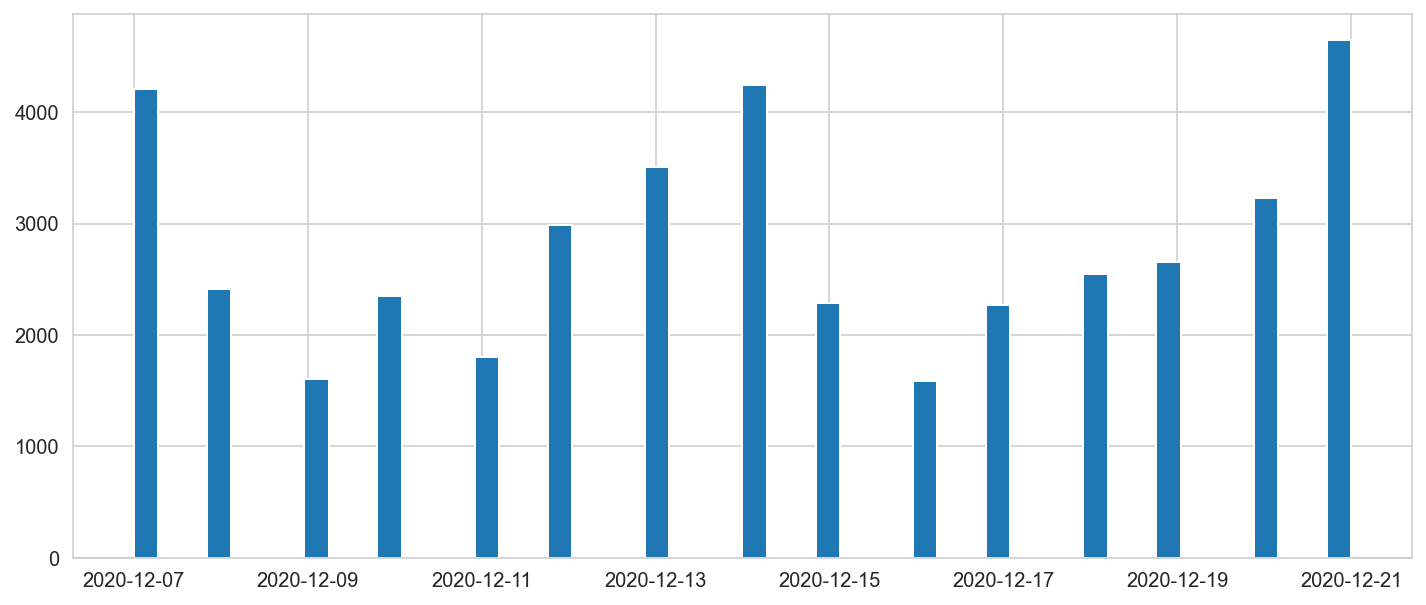

In [22]:
# просмотрим равномерность и динамику набора пользователей в группы
users1['first_date'].hist(bins=50, figsize=(12,5))
plt.show()

In [23]:
# соединим датафреймы чтобы узнать группы пользователей
users1_ab = users1.merge(participants1[['user_id', 'group']], on='user_id', how='left')

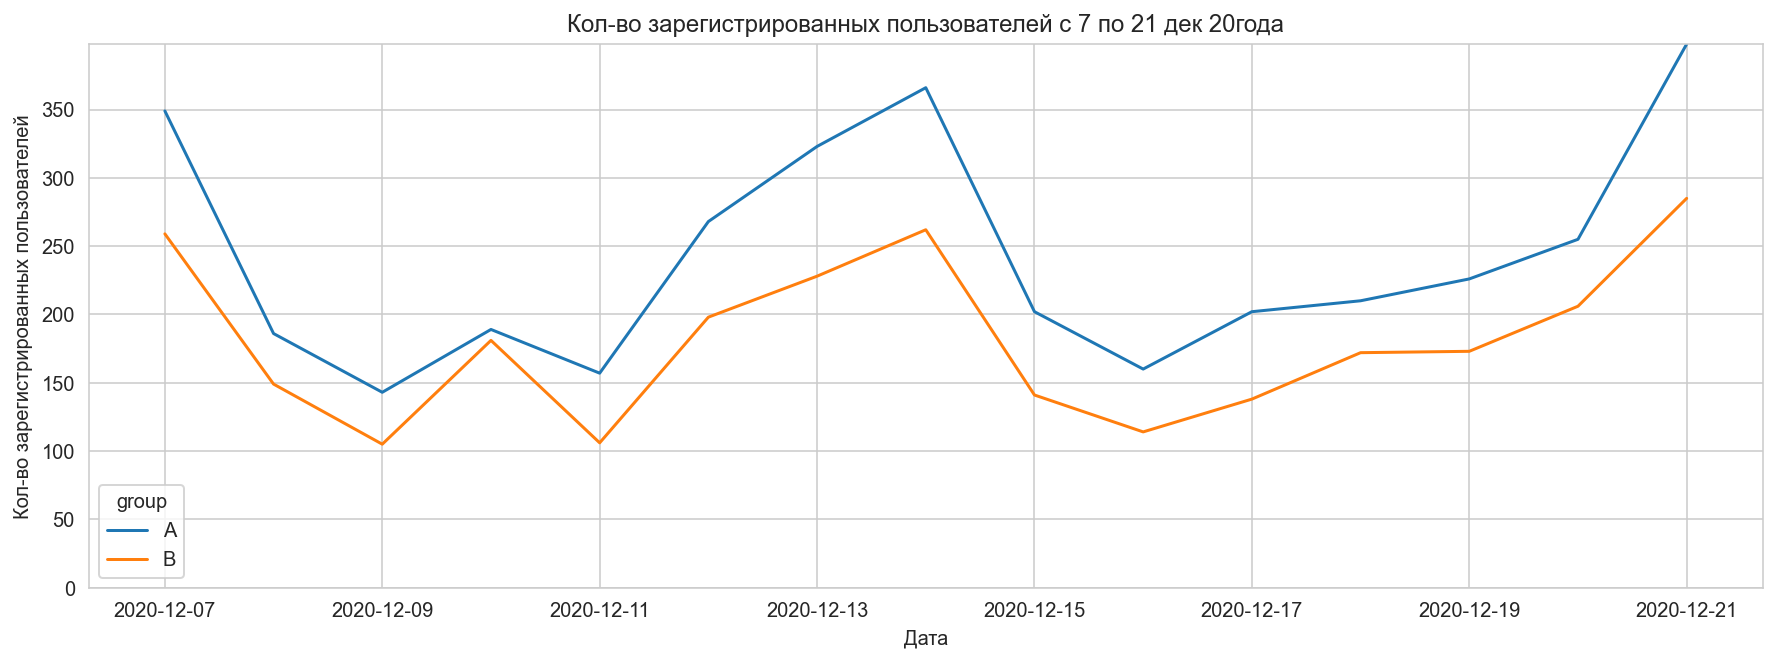

In [24]:
# Кол-во заказов по месяцам
# сгруппируем по месяцам
users1_ab_f = users1_ab.query('group.notna()')
users1_ab_gr = (users1_ab_f
                    .groupby(['first_date', 'group'], as_index=False)[['user_id']].count()
                    )
plt.figure(figsize=(15, 5))
sns.lineplot(data=users1_ab_gr, x='first_date', y='user_id', hue='group')
plt.title('Кол-во зарегистрированных пользователей с 7 по 21 дек 20года')
plt.xlabel('Дата')
plt.ylabel('Кол-во зарегистрированных пользователей')
plt.ylim(0, users1_ab_gr['user_id'].max())
plt.show()

Группы А и В синхронно идут по датам (хотя могут идти не одинаково), есть определенные дни-пики 7,14,21 декабря (это понедельники), 9,11, 16 -спад (это среды и пт).

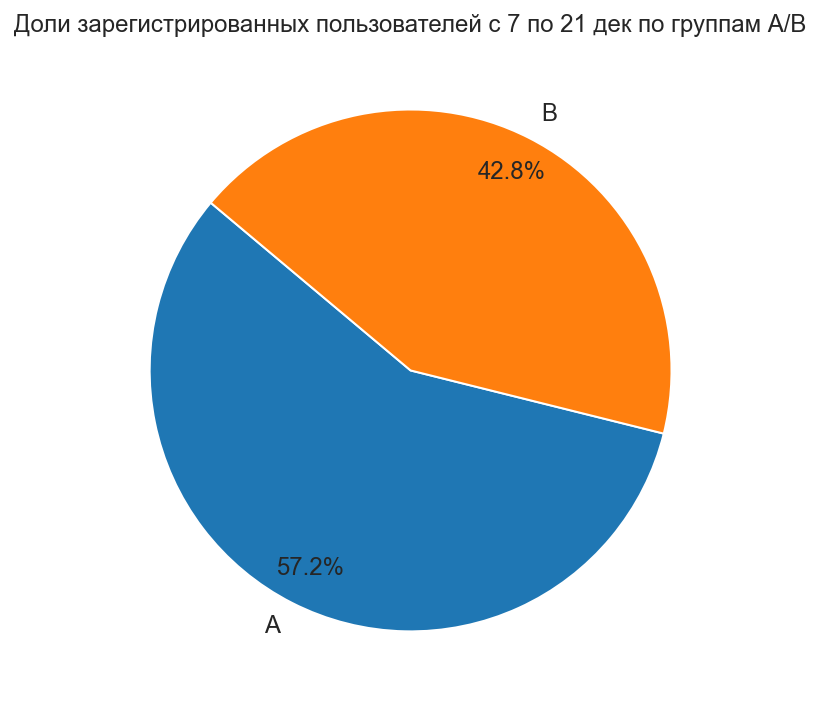

In [25]:
ab_share = users1_ab_f['group'].value_counts()

plt.figure(figsize=(6, 6))
# Создаем круговую диаграмму с процентами
plt.pie(ab_share,
        labels=ab_share.index,
        autopct='%1.1f%%',
        startangle=140,
        textprops={'fontsize': 12},
        pctdistance=0.85)
plt.title('Доли зарегистрированных пользователей с 7 по 21 дек по группам А/В')
plt.show()

Неотфильтрованная доля группы А-57% больше немного, группа В -43%.

### 3.3 Удостоверьтесь, что нет пересечений с конкурирующим тестом и нет пользователей, участвующих в двух группах теста одновременно.

In [26]:
# посмотрим в изначальных датафреймах есть ли пользователи участвовавшые в обоих тестах?
u2 = participants.groupby('user_id', as_index=False)['ab_test'].nunique()
u2 = u2.query('ab_test > 1')

len(u2)

1602

Всего есть 1602 пользователей которые участвуют в обоих тестах

In [27]:
u2_2 = participants.merge(u2[['user_id']], on='user_id', how='inner')
print(lookup(u2_2))
print(u2_2.query('ab_test == "interface_eu_test"')['group'].value_counts())
print(u2_2.query('ab_test == "recommender_system_test"')['group'].value_counts())

Dataset shape (3204, 3) , example:


,2324,3004
user_id,FAE7366835730F51,79DF9D6EDC7A58CE
group,B,A
ab_test,recommender_system_test,recommender_system_test


user_id — 1602 values. MIN 001064FEAAB631A1, MAX: FFF28D02B1EACBE1


,A,B
group,1_740,1_464


,interface_eu_test,recommender_system_test
ab_test,1_602,1_602




None
A    819
B    783
Name: group, dtype: int64
A    921
B    681
Name: group, dtype: int64


Все 1602 пользователей участвовали в обоих тестах recommender_system_test	interface_eu_test одновременно, распределение на группы А/В обоих тестов почти равнозначное (чуть больше А), второй тест влияет в равной степени, поэтому этих пользователей оставляем.

### 3.4 Изучите данные о пользовательской активности:

#### 3.4.1. даты совершения событий участниками теста: совпадают ли они с датами проведения теста, согласно техническому заданию;
- из п.1.2 По ТЗ "/final_ab_events.csv — все события новых пользователей в период с 7 декабря 2020 по 4 января 2021 года:", по факту события собраны в период с 07 дек по 30дек (на 5 дней меньше).

#### 3.4.2. активность пользователей: все ли зарегистрированные пользователи прошли авторизацию и совершали переход по продуктовой воронке; если есть пользователи, которые не совершали событий после регистрации, изучите их количество и распределение между группами теста; сделайте вывод о необходимости учитывать пользователей без событий при изучении результатов теста; 


In [28]:
# выбор метода соединения таблиц 'outer' чтобы отследить тех пользователей
# но не произвели никаких действий
df_all = users1_ab.merge(ab_events1, on='user_id', how='outer')
print(len(ab_events1), len(df_all))
user_nan = df_all.query('event_dt.isna()')
print(user_nan.shape)


print('Пользователей зарегестрировалось и ничего дальше не делало (без событий, всех):',
      user_nan['user_id'].nunique())
print('Пользователей зарегистрировалось и ничего дальше не делало (без событий, из АВ теста):',
      (user_nan.query('group.notna()')['user_id'].nunique()))
print('Даты регистраций пользователей (без событий):\n',
      user_nan['first_date'].value_counts().sort_index())
print('\nПользователей АВ теста:', len(participants1))
print('\nПользователей всех зарегестрировавшихся:', len(users1))

440317 443191
(2874, 8)
Пользователей зарегестрировалось и ничего дальше не делало (без событий, всех): 2874
Пользователей зарегистрировалось и ничего дальше не делало (без событий, из АВ теста): 2870
Даты регистраций пользователей (без событий):
 2020-12-07    287
2020-12-08    203
2020-12-09     87
2020-12-10    278
2020-12-11    157
2020-12-12    355
2020-12-13    485
2020-12-14    194
2020-12-15    110
2020-12-16     17
2020-12-17    102
2020-12-18    124
2020-12-19    130
2020-12-20    143
2020-12-21    202
Name: first_date, dtype: int64

Пользователей АВ теста: 6701

Пользователей всех зарегестрировавшихся: 42340


In [29]:
print('Количество уникальных зарегестрированных (без событий) по группам:\n',
      user_nan['group'].value_counts())
participants1_filter = participants1.query('user_id not in @user_nan["user_id"]')
print('Количество уникальных зарегестрированных (с событиями) по группам:\n',
      participants1_filter['group'].value_counts())

Количество уникальных зарегестрированных (без событий) по группам:
 B    1840
A    1030
Name: group, dtype: int64
Количество уникальных зарегестрированных (с событиями) по группам:
 A    2794
B    1037
Name: group, dtype: int64


* Есть пользователи, которые зарегистрированы в /final_ab_new_users.csv в период с 7 по 21 декабря, но их нету в событиях final_ab_events.csv, потерявшиеся. Эти пользователи +- равномерно зарегистрированы по датам, они зарегистрировались но ничего после этого не делали, и их большое количество 2870 из 6701 (43%! из АВ теста), не из АБ теста потерявшихся всего 4/42340. Возможно, что новый интерфейс АВ тестов/либо еще какая-то причина просто не дало технической возможности после регистрации делать какие либо действия/события, либо эти события не были занесены в логи. По группам АВ у потерявшихся (без событий) много группы В-1840, а группы А-1030 в 2раза меньше, а у зарегистрированных (с событиями) по остаточному принципу много группы А-2794, а В-1037 в 3 раза меньше!
* Вывод: зарегистрированных/потерявшихся пользователей (без событий) невозможно дальше проанализировать т.к. у них нет событий, также видна какая то явно техническая проблема(43% отвалились), поэтому в дальнейшем анализе мы их не будем учитывать.

#### 3.4.3. горизонт анализа: рассчитайте лайфтайм совершения события пользователем после регистрации, оставьте только те события, которые были совершены в первые 14 дней с момента регистрации; проверьте, что все участники теста имели возможность совершать события все 14 дней с момента регистрации, оцените когда пользователи совершают свои первые события каждого вида.


In [30]:
# доступный интервал привлечения пользователей
min_analysis_date = df_all['event_dt'].min().date()
max_analysis_date = df_all['event_dt'].max().date()
dif_date = (max_analysis_date - min_analysis_date).days
print(f'''Минимальная дата привлечения пользователей: {min_analysis_date}'
Максимальная дата привлечения пользователей: {max_analysis_date}
Разница дней: {dif_date}''')

Минимальная дата привлечения пользователей: 2020-12-07'
Максимальная дата привлечения пользователей: 2020-12-30
Разница дней: 23


In [31]:
# горизонт анализа
horizon_days = 14 - 1

In [32]:
# уберем пользователей потерявшихся без событий
df_all_filter = df_all.query('user_id not in @user_nan["user_id"]')
print(len(df_all_filter))

# оставим пользователей только из AB теста
df_all_filter_ab = df_all_filter.query('user_id in @participants1_filter["user_id"]')
print(len(df_all_filter_ab))

440317
24698


In [33]:
# добавим день события
df_all_filter_ab['event_day'] = df_all_filter_ab['event_dt'].dt.date

df_all_filter_ab['event_day'] = pd.to_datetime(df_all_filter_ab['event_day'], format='%Y-%m-%d')
#df_all_filter_ab.sort_values(by='event_day')

In [34]:
# рассчитаем лайфтайм события в номерах днях (первый день = 0ой)
df_all_filter_ab['event_lifetime'] = (df_all_filter_ab['event_day'] - df_all_filter_ab['first_date']).dt.days

# отфильтруем события с даты регистрации до события до горизонта анализа 14 дней
df_all_filter_ab = df_all_filter_ab.query('event_lifetime <= @horizon_days')
#df_all_filter_ab.sort_values(by='event_lifetime')

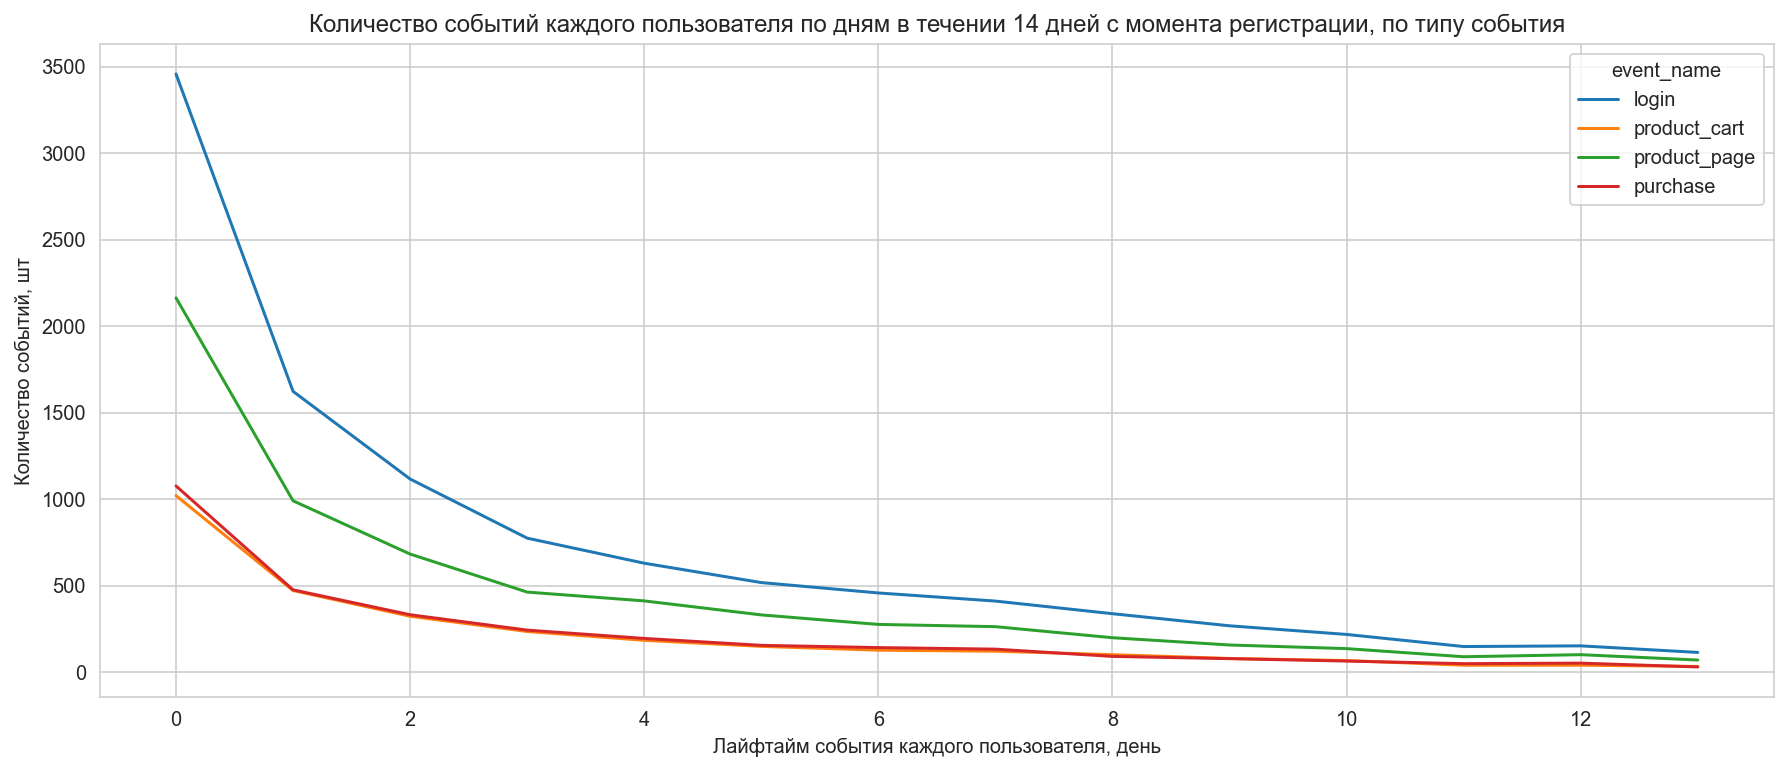

In [35]:
# сгруппируем по названию события event_name и дню лайфтайма
event_name_lt = df_all_filter_ab.groupby(['event_name', 'event_lifetime'], as_index=False)[['user_id']].count()

plt.figure(figsize=(15, 6))
sns.lineplot(data=event_name_lt, x='event_lifetime', y='user_id', hue='event_name')
plt.title('Количество событий каждого пользователя по дням в течении 14 дней с момента регистрации, по типу события')
plt.xlabel('Лайфтайм события каждого пользователя, день')
plt.ylabel('Количество событий, шт')
#plt.ylim(event_name_lt['event_lifetime'].min(), event_name_lt['event_lifetime'].max())
plt.show()

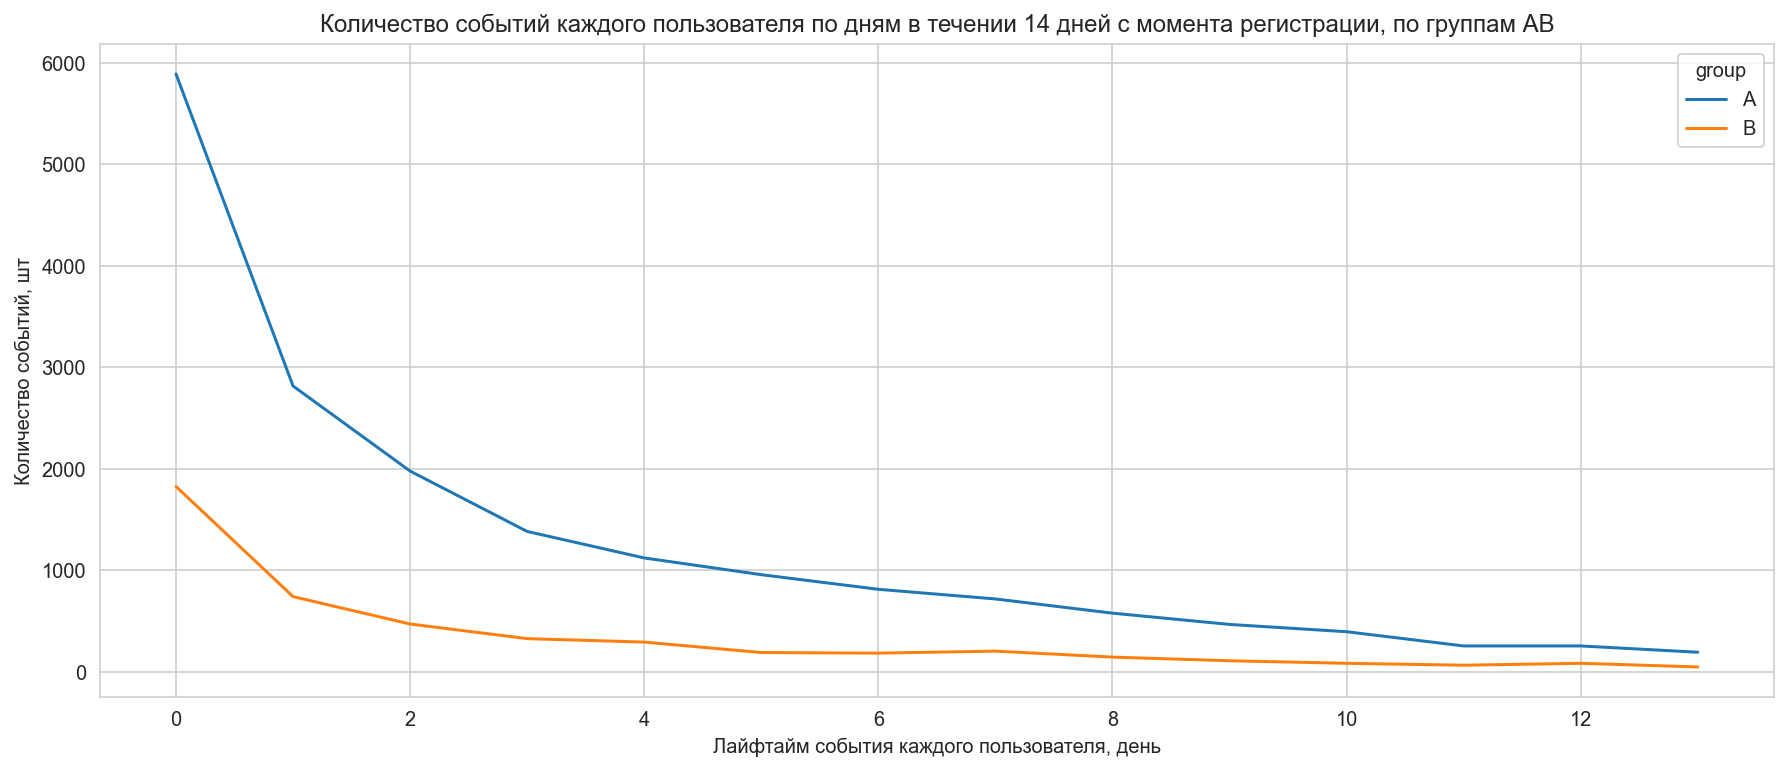

In [36]:
# сгруппируем по названию события event_name и дню лайфтайма
group_lt = df_all_filter_ab.groupby(['group', 'event_lifetime'], as_index=False)[['user_id']].count()

plt.figure(figsize=(15, 6))
sns.lineplot(data=group_lt,
             x='event_lifetime',
             y='user_id',
             hue='group')
plt.title('Количество событий каждого пользователя по дням в течении 14 дней с момента регистрации, по группам АВ')
plt.xlabel('Лайфтайм события каждого пользователя, день')
plt.ylabel('Количество событий, шт')
plt.show()

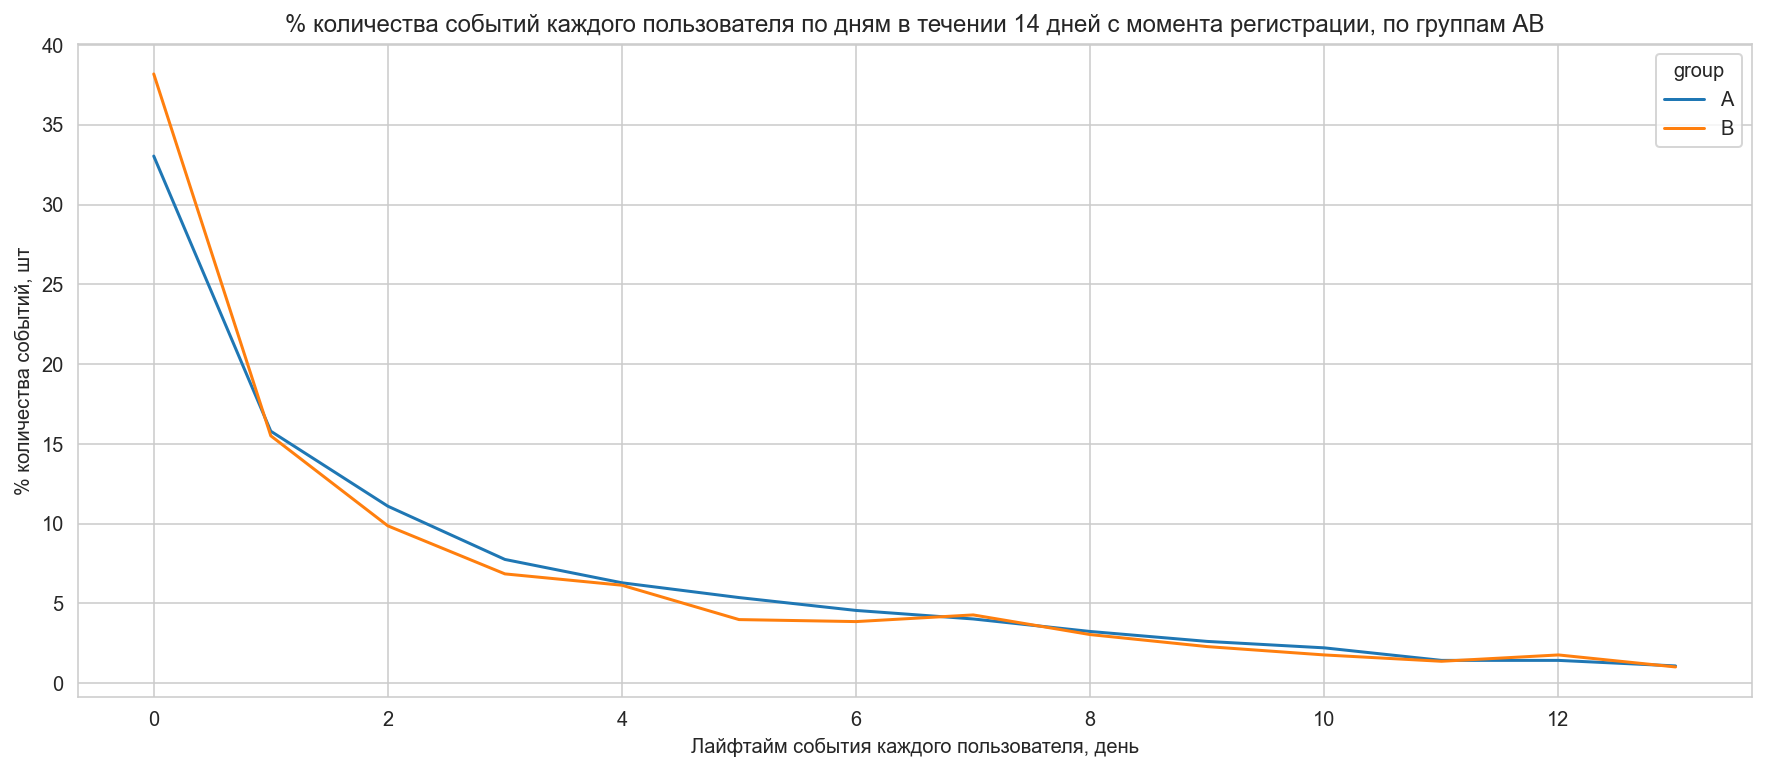

In [37]:
# посмотрим отнормированные в долях % по группам
group_lt['percentage'] = (group_lt['user_id'] /
                          group_lt.groupby('group')['user_id'].transform('sum')) * 100
                          
plt.figure(figsize=(15, 6))
sns.lineplot(data=group_lt,
             x='event_lifetime',
             y='percentage',
             hue='group')
plt.title('% количества событий каждого пользователя по дням в течении 14 дней с момента регистрации, по группам АВ')
plt.xlabel('Лайфтайм события каждого пользователя, день')
plt.ylabel('% количества событий, шт')
plt.show()

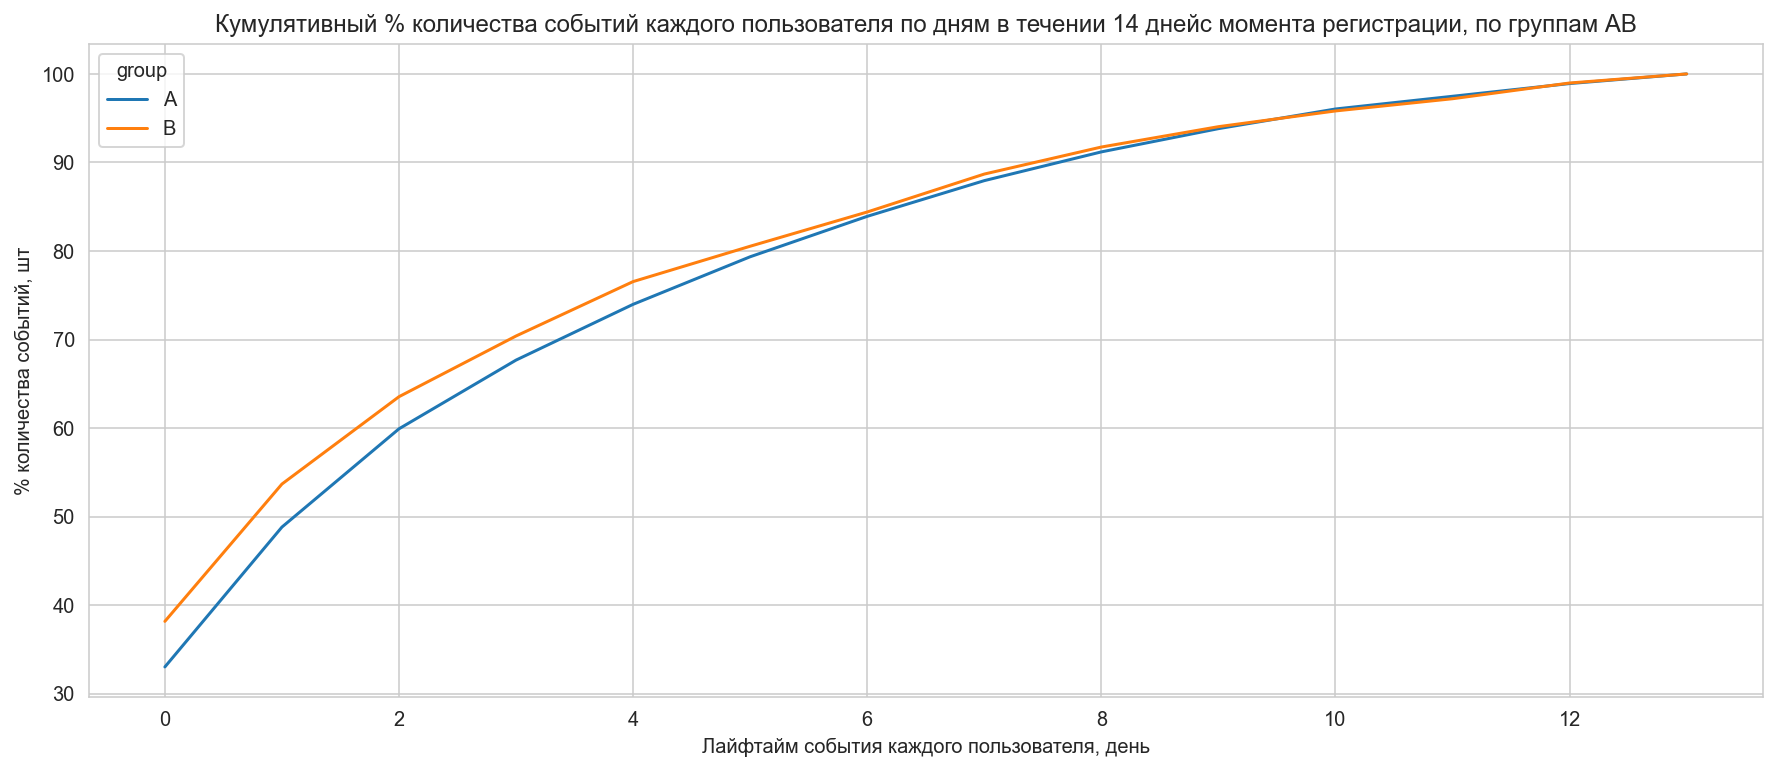

In [38]:
# посмотрим отнормированные в долях % кумулятивные по группам
group_lt['percentage_cum'] = group_lt.groupby('group')['percentage'].cumsum()

plt.figure(figsize=(15, 6))
sns.lineplot(data=group_lt,
             x='event_lifetime',
             y='percentage_cum',
             hue='group')
plt.title('Кумулятивный % количества событий каждого пользователя по дням в течении 14 дней\
с момента регистрации, по группам АВ')
plt.xlabel('Лайфтайм события каждого пользователя, день')
plt.ylabel('% количества событий, шт')
plt.show()

In [39]:
# выведем в числах
group_lt

,group,event_lifetime,user_id,percentage,percentage_cum
0,A,0.0,5892,33.036165,33.036165
1,A,1.0,2817,15.794786,48.830950
2,A,2.0,1979,11.096159,59.927110
3,A,3.0,1384,7.760022,67.687132
4,A,4.0,1123,6.296608,73.983740
5,A,5.0,958,5.371461,79.355200
6,A,6.0,814,4.564059,83.919260
7,A,7.0,719,4.031399,87.950659
8,A,8.0,579,3.246426,91.197084
9,A,9.0,468,2.624054,93.821138


* Большинство пользователей совершают login(вход) > product_page(конверсии в просмотр карточек товаров) > purchase(покупки)/product_cart(просмотры корзины) в первый день сразу. Покупки и Просмотры корзины сливаются потому что происходят одновременно.
* Действий в 1ый день (отнормированные по группе) А:33%, В:38%, группа В совершает больше действий в 1ый день.

#### 3.4.4. Представьте развернутый вывод о соответствии теста требованиям технического задания и возможности получения достоверных результатов АБ-теста, исходя из базового показателя конверсии в 50%.

In [40]:
# доп. проверка на пользователей которые есть и в группе А и в группе В.
u_a = df_all_filter_ab.query('group == "A"')['user_id']
u_b = df_all_filter_ab.query('group == "B"')['user_id']
common_users = df_all_filter_ab.query('user_id in @u_a & user_id in @u_b')
common_users

,user_id,first_date,region,device,group,event_dt,event_name,details,event_day,event_lifetime


In [41]:
df_all_filter_ab[['user_id']].nunique()

user_id    3481
dtype: int64

In [42]:
# расчитаем конверсию 

# посчитаем кол-во покупок У каждого пользователя
con = df_all_filter_ab.groupby(['user_id'])[['details']].count()

# расчитаем долю людей совершивших покупку
c = round(len(con.query('details > 0')) / len (con) *100, 1)
print(f'Общая конверсия людей совершивших покупку: {c}%')

Общая конверсия людей совершивших покупку: 31.1%


In [43]:
print(f'Размер выборки с событиями: {len(df_all_filter_ab)}')

Размер выборки с событиями: 22620


* Если воспользоваться калькулятором (https://www.evanmiller.org/ab-testing/sample-size.html):  базовый показатель конверсии 50%, мин.ожидаемый эффект 5%, мощность 80, альфа 5% для опредления  Относительного различия конверсии нам нужен размер выборки: 6277. А нас же размер выборки с событиями 14775, что в принципе достаточно для предоставлении достоверных результатов АБ-теста. Также по факту события собраны в период с 07 дек по 30дек (на 5 дней меньше чем планировалось до 4января), но это не должно повлиять.

## 4. EDA - исследовательский анализ данных


### 4.1 Распределение количества событий на пользователя в разрезе групп теста: постройте гистограмму распределения этой величины в разрезе групп и сравните её средние значения между собой у групп теста;

In [44]:
# посчитаем кол-во событий на пользователя в разрезе групп АВ
event_per_u = df_all_filter_ab.groupby(['user_id', 'group'], as_index=False)[['event_name']].count()
#event_per_u.sort_values(by='event_name')

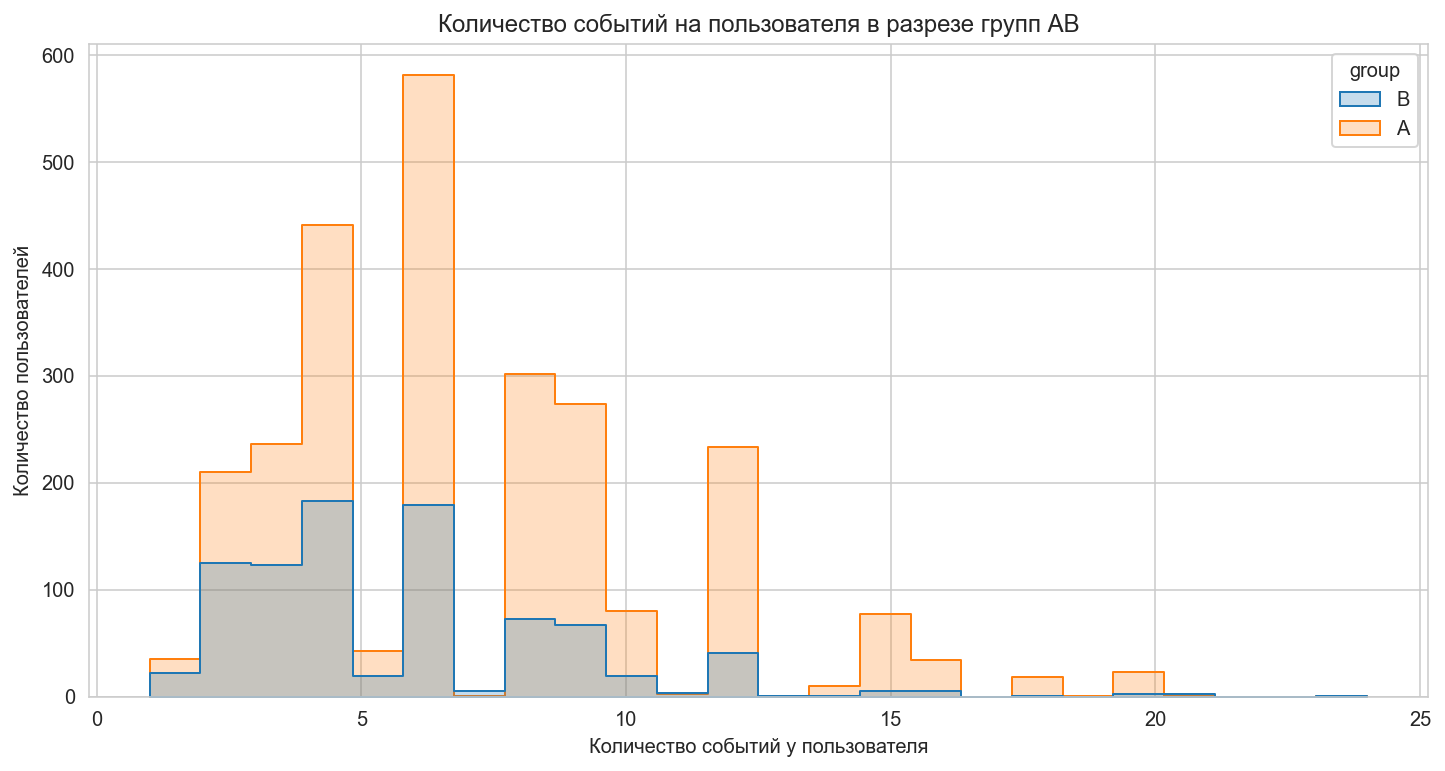

In [45]:
plt.figure(figsize=(12, 6))
sns.histplot(data=event_per_u,
             x='event_name',
             hue='group',
             element='step',
             bins=event_per_u['event_name'].max(),
            )
plt.title('Количество событий на пользователя в разрезе групп АВ')
plt.xlabel('Количество событий у пользователя')
plt.ylabel('Количество пользователей')
plt.show()

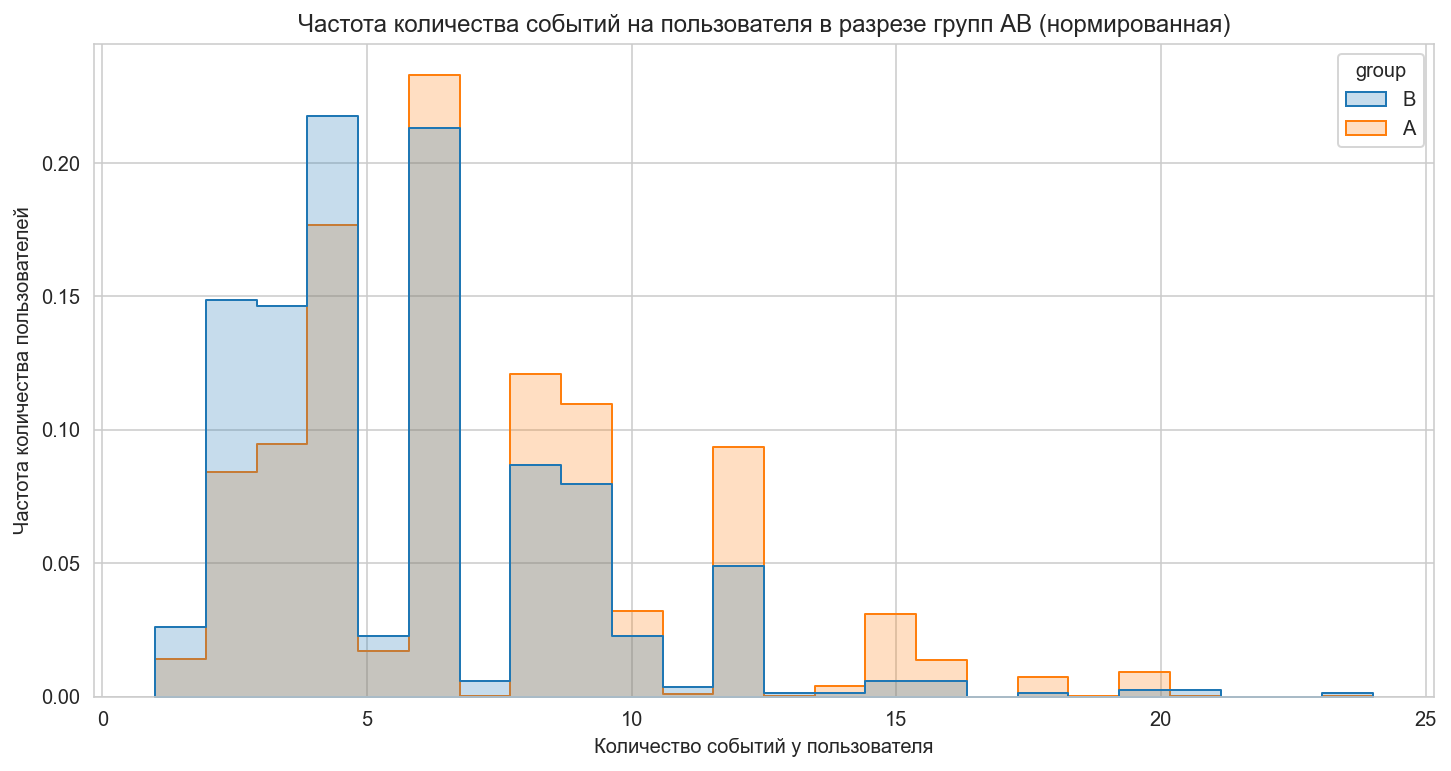

In [46]:
plt.figure(figsize=(12, 6))
sns.histplot(data=event_per_u,
             x='event_name',
             hue='group',
             element='step',
             bins=event_per_u['event_name'].max(),
             stat='density', # частора
             common_norm=False # нормированные данные
            )
plt.title('Частота количества событий на пользователя в разрезе групп АВ (нормированная)')
plt.xlabel('Количество событий у пользователя')
plt.ylabel('Частота количества пользователей')
plt.show()

In [47]:
event_per_u.groupby('group')['event_name'].mean()

group
A    6.849078
B    5.456100
Name: event_name, dtype: float64

* По количеству событий на пользователя (нормированные) видно, что пользователи группы А совершали большее кол-во событий (6.8шт), а группа В меньшее кол-во событий (5.4шт).

### 4.2 Динамика количества событий в группах теста по дням: изучите распределение числа событий по дням и сравните динамику групп теста между собой.

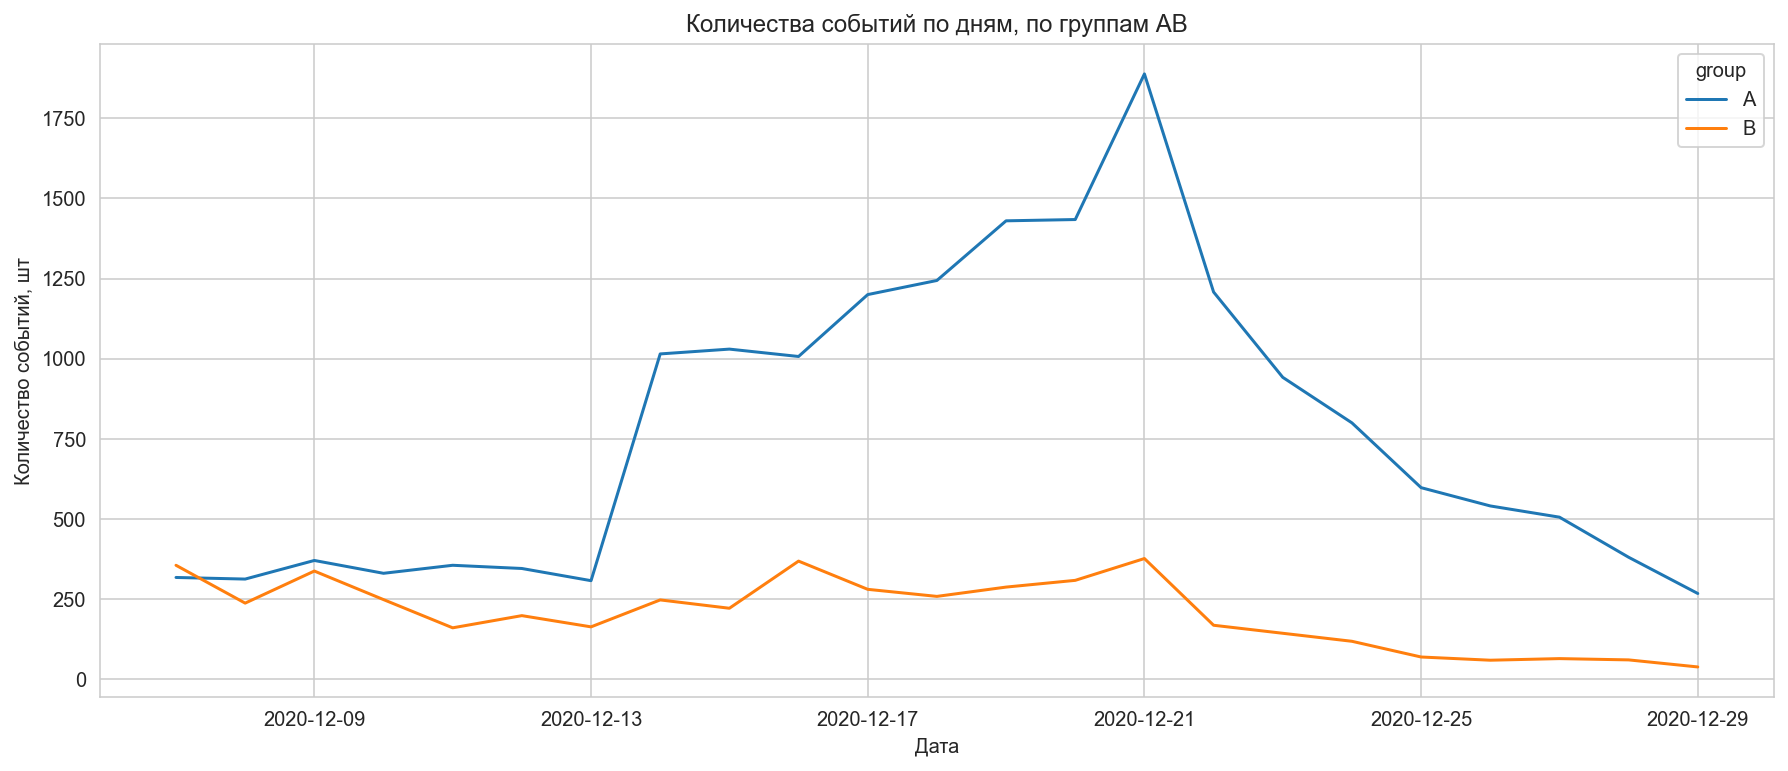

In [48]:
# посчитаем кол-во событий по дням в разрезе групп АВ
event_per_d = df_all_filter_ab.groupby(['event_day', 'group'], as_index=False)[['event_name']].count()

plt.figure(figsize=(15, 6))
sns.lineplot(data=event_per_d,
             x='event_day',
             y='event_name',
             hue='group')
plt.title('Количества событий по дням, по группам АВ')
plt.xlabel('Дата')
plt.ylabel('Количество событий, шт')
plt.show()

In [49]:
# посмотрим кол-во уникальных пользователей
(df_all_filter_ab.query('event_day == "2020-12-13" | event_day == "2020-12-14"')
 .groupby(['event_day', 'group'])[['user_id']].nunique()
 )

user_id
event_day  group         
2020-12-13 A          154
           B           81
2020-12-14 A          461
           B          120

In [50]:
# посмотрим кол-во уникальных новых зарегестрированных пользователей
df_all_filter_ab.groupby(['first_date', 'group'])[['user_id']].nunique()

user_id
first_date group         
2020-12-07 A          154
           B          171
2020-12-08 A           90
           B           42
2020-12-09 A           81
           B           80
2020-12-10 A           60
           B           32
2020-12-11 A           87
           B           19
2020-12-12 A           61
           B           50
2020-12-13 A           52
           B           14
2020-12-14 A          366
           B           68
2020-12-15 A          202
           B           31
2020-12-16 A          160
           B           97
2020-12-17 A          202
           B           36
2020-12-18 A          210
           B           48
2020-12-19 A          226
           B           43
2020-12-20 A          255
           B           63
2020-12-21 A          398
           B           83

* Количество событий по дням распределено равномерно (группа А чуть больше), но  с 2020.12.14-21 был резкий скачок в группе А (около 7 дней), при этом возросла активность уникальных пользователей группы А в эти дни за счет того, что был резкий скачок новых зарегистрированных пользователей группы А (с событиями). Если посмотреть п.3.1 то примерно синхронно количество пользователей должно быть зарегистрировано (с событиями и без). Вывод, с 2020-12-14 надо поискать техническую неполадку, то есть пользователи группы В регистрировались но не делали никаких событий.

### 4.3 Убедитесь, что время проведения теста не совпадает с маркетинговыми и другими активностями. Настройте автоматическую проверку, выдающую список событий, пересекающихся с тестом. При необходимости оцените воздействие маркетинговых событий на динамику количества событий.

In [51]:
# дополнительные дни для расширения диапазона просмотра маркетинговых событий
# дней до
days_before = 0
# дней после
days_after = 0

# доступный интервал привлечения пользователей
min_analysis_date = pd.to_datetime(df_all['event_dt'].min()) - timedelta(days=days_before)
max_analysis_date = pd.to_datetime(df_all['event_dt'].max()) + timedelta(days=days_after)

# отфильтруем датафрейм с маркетинговыми событиями
events1_filter = events1[(events1['start_dt'] <= max_analysis_date) &
                         (events1['finish_dt'] >= min_analysis_date)]
if len(events1_filter) > 0:
    print('Есть пересечения времени проведения теста с маркетинговыми событиями:')
    display(events1_filter)
else:
    print('Нет пересечений времени проведения теста с маркетинговыми событиями.')

Есть пересечения времени проведения теста с маркетинговыми событиями:


,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
10,CIS New Year Gift Lottery,CIS,2020-12-30,2021-01-07


* Возможное только влияние маркетингового события "Рождество 2020-12-25:2021-01-03 EU, N.America", может повлияло на количество регистрируемых пользоватей начиная с 2020-12-14. Может они за 10 дней до события запустили компанию. Но по графикам не видно с 25 числа никакого всплеска, и по идее оно никак не повлияло на наш тест.

### 4.4 Продуктовая воронка: постройте простые продуктовые воронки для двух групп теста с учетом логической последовательности совершения событий; изучите изменение конверсии в продуктовой воронке тестовой группы, по сравнению с контрольной: наблюдается ли ожидаемый эффект увеличения конверсии в группе В, относительно конверсии в группе А?

In [52]:
voron_ab = df_all_filter_ab.groupby(['group', 'event_name'], as_index=False)[['user_id']].nunique()

# # порядок верный
desired_order = ['login', 'product_page', 'product_cart', 'purchase']
# voron_ab = voron_ab.sort_values('event_name')

# сортируем датафрейм voron_ab по столбцу 'event_name' в желаемом порядке
voron_ab = voron_ab.sort_values(by=['event_name'], key=lambda x: x.map(desired_order.index))
# сброс индексов
voron_ab.reset_index(drop=True, inplace=True)

voron_ab

,group,event_name,user_id
0,A,login,2604
1,B,login,876
2,A,product_page,1685
3,B,product_page,493
4,A,product_cart,782
5,B,product_cart,244
6,A,purchase,833
7,B,purchase,249


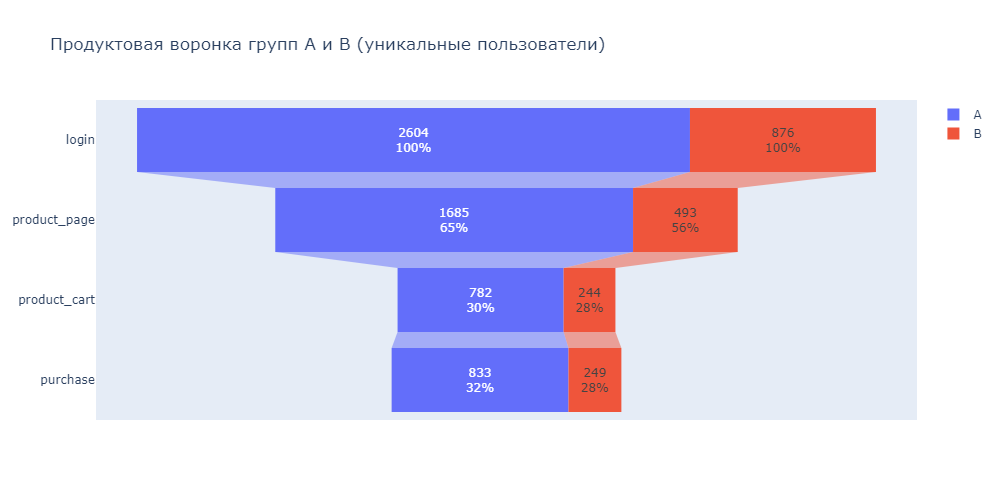

In [62]:
# https://plotly.com/python/funnel-charts/#stacked-funnel-plot-with-gofunnel
fig = go.Figure()

fig.add_trace(go.Funnel(
    name = 'A',
    #orientation = "h",
    y = voron_ab.query('group == "A"')['event_name'],
    x = voron_ab.query('group == "A"')['user_id'],
    textinfo = "value+percent initial"))

fig.add_trace(go.Funnel(
    name = 'B',
    #orientation = "h",
    y = voron_ab.query('group == "B"')['event_name'],
    x = voron_ab.query('group == "B"')['user_id'],
    textinfo = "value+percent initial"))

fig.update_layout(title='Продуктовая воронка групп A и В (уникальные пользователи)',
                 width=1000, height=500)
fig.show()

* По продуктовым воронкам, на страницу карточки товара зашли А:65% В:56%, просмотр корзины А:30% В:28%, оплатили А:32% В:28%. Корзину просматривали чуть меньше количества оплат (сразу оплачивали в 1 клик) обе группы. Итого група B (новая платёжная воронка) стала немного хуже по показателям воронки.  Цель - улучшение в 5% не доснигнута.

### 4.5 Сделайте общий вывод об изменении пользовательской активности в тестовой группе, по сравнению с контрольной.

1. По количеству событий на пользователя (нормированные) видно, что пользователи группы А совершали большее кол-во событий (6.8шт), а группа В меньшее кол-во событий (5.4шт).
2. Количество событий по дням распределено равномерно (группа А чуть больше), но  с 2020.12.14-21 был резкий скачок в группе А (около 7 дней), при этом возросла активность уникальных пользователей группы А в эти дни за счет того, что был резкий скачок новых зарегистрированных пользователей группы А (с событиями). Если посмотреть п.3.1 то примерно синхронно количество пользователей должно быть зарегистрировано (с событиями и без). Вывод, с 2020-12-14 надо поискать техническую неполадку, то есть пользователи группы В регистрировались но не делали никаких событий.
3. Возможное только влияние маркетингового события "Рождество 2020-12-25:2021-01-03 EU, N.America", может повлияло на количество регистрируемых пользоватей начиная с 2020-12-14. Может они за 10 дней до события запустили компанию. Но по графикам не видно с 25 числа никакого всплеска, и по идее оно никак не повлияло на наш тест.
4. По продуктовым воронкам, на страницу карточки товара зашли А:65% В:56%, просмотр корзины А:30% В:28%, оплатили А:32% В:28%. Корзину просматривали чуть меньше количества оплат (сразу оплачивали в 1 клик) обе группы. Итого група B (новая платёжная воронка) стала немного хуже по показателям воронки. Цель - улучшение в 5% не достигнута.

## 5. Оценка результатов A/B-тестирования (проверка статистической разницы долей z-критерием)

###  5.1 Проверка гипотезы на различие долей уникальных пользователей по воронке между группами А и В
```
Зададим общие гипотезы:
(для 3ех тестов:
1. конверсии в просмотр карточек товаров — событие product_page,
2. просмотры корзины — product_cart,
3. покупки — purchase)

H_0 (нулевая гипотеза): Нет различий долей уникальных пользователей между группами А и В
H_A (альтер-ая гипотеза): Есть различия долей уникальных пользователей между группами А и В
alpha = 0.05 (Исходный уровень статистической значимости)
```

In [54]:
# 1. конверсии в просмотр карточек товаров — событие product_page,

# данные из воронки
A_count = 1685  # Количество пользователей успешных в группе A
A_nobs = 2604  # Общее кол-во пользователей в группе A

B_count = 493  # Количество пользователей успешных в группе B
B_nobs = 876  # Общее кол-во пользователей в группе B

# Проведение теста разницы долей
z_stat, p_value1 = proportions_ztest(# count количество успешных событий в [A, B]
                                    [A_count, B_count], 
                                    # nobs количество наблюдений в [A, B]
                                    [A_nobs, B_nobs]
                                    )
# уровень стат значимости
alpha = 0.05
print('p-value:', p_value1)

# Проведение теста и вывод результата
if p_value1 < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима.')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя.')

p-value: 8.195976000351998e-06
Отвергаем нулевую гипотезу: разница статистически значима.


In [55]:
# 2. просмотры корзины — product_cart,

# данные из воронки
A_count = 782  # Количество пользователей успешных в группе A
A_nobs = 2604  # Общее кол-во пользователей в группе A

B_count = 244  # Количество пользователей успешных в группе B
B_nobs = 876  # Общее кол-во пользователей в группе B

# Проведение теста разницы долей
z_stat, p_value2 = proportions_ztest(# count количество успешных событий в [A, B]
                                    [A_count, B_count], 
                                    # nobs количество наблюдений в [A, B]
                                    [A_nobs, B_nobs]
                                    )
# уровень стат значимости
alpha = 0.05
print('p-value:', p_value2)

# Проведение теста и вывод результата
if p_value2 < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима.')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя.')

p-value: 0.2215941567364419
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя.


In [56]:
# 3. покупки — purchase

# данные из воронки
A_count = 833  # Количество пользователей успешных в группе A
A_nobs = 2604  # Общее кол-во пользователей в группе A

B_count = 249  # Количество пользователей успешных в группе B
B_nobs = 876  # Общее кол-во пользователей в группе B

# Проведение теста разницы долей
z_stat, p_value3 = proportions_ztest(# count количество успешных событий в [A, B]
                                    [A_count, B_count], 
                                    # nobs количество наблюдений в [A, B]
                                    [A_nobs, B_nobs]
                                    )
# уровень стат значимости
alpha = 0.05
print('p-value:', p_value3)

# Проведение теста и вывод результата
if p_value3 < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима.')
else:
    print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя.')

p-value: 0.0486476669504243
Отвергаем нулевую гипотезу: разница статистически значима.


In [57]:
# поправка по множественной проверки гипотез

# соберем все значения p_value в список
p_values = [p_value1, p_value2, p_value3]

print('Множественная проверка гипотез на различие долей уникальных пользователей по воронке между группами А и В.')

# Коррекция уровня значимости с использованием метода Шидака
print('\nКоррекция уровня значимости с использованием метода Шидака:')
# Исходный уровень статистической значимости
alpha = 0.05
n_tests = len(p_values)
alpha_shid = round(1 - (1 - alpha) ** (1 / n_tests), 5)
print('Количество тестов:', n_tests,
     '\nСкорректированный уровень значимости alpha_shid:', round(alpha_shid, 5),
     '\nСравнение и переверка всех p_value с скорректированным alpha_shid:')
# Вывод результата
for p_value in p_values:
    print('\np_value:', p_value, 'vs alpha_shid:', alpha_shid)
    if p_value < alpha_shid:
        print('Отвергаем нулевую гипотезу: разница статистически значима.')
    else:
        print('Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя.')

Множественная проверка гипотез на различие долей уникальных пользователей по воронке между группами А и В.

Коррекция уровня значимости с использованием метода Шидака:
Количество тестов: 3 
Скорректированный уровень значимости alpha_shid: 0.01695 
Сравнение и переверка всех p_value с скорректированным alpha_shid:

p_value: 8.195976000351998e-06 vs alpha_shid: 0.01695
Отвергаем нулевую гипотезу: разница статистически значима.

p_value: 0.2215941567364419 vs alpha_shid: 0.01695
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя.

p_value: 0.0486476669504243 vs alpha_shid: 0.01695
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя.


* Разница долей уникальных пользователей по воронке между группами А и В (с учетом коррекция уровня значимости с использованием метода Шидака alpha_shid: 0.017):
    1. Просмотры карточек товаров (product_page): p_value: 0.00 Отвергаем нулевую гипотезу: разница статистически значима.
    2. Просмотры корзины (product_cart): p_value: 0.22 Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя.
    3. Покупки (purchase): p_value: 0.048 Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя.
    4. Вывод: Для 1 этапа воронки разница статистически значима, но для 2 и 3 этапов различия не статистически значимы (хотя у 3его этапа Покупки p_value очень близок к 0.05). Если хотя бы 1 этап конверсии отличается, то это уже означает что изменения в конверсии связаны с нашим АВ тестом, в итоге эффект был достигнут в худшую сторону, группа В на 1ом этапе воронки явно стала хуже.

In [58]:
# дополнительно посчитаем сумму покупок на 1 пользователя
purchase_sum = df_all_filter_ab.groupby(['group', 'user_id'], as_index=False)[['details']].sum()
purchase_sum2 = purchase_sum.groupby(['group'], as_index=False)[['details']].sum()
purchase_sum3 = purchase_sum.groupby(['group'], as_index=False)[['user_id']].count()
purchase_sum3 = purchase_sum3.merge(purchase_sum2, on='group', how='inner')
purchase_sum3['coast_per_u'] = purchase_sum3['details'] / purchase_sum3['user_id']
purchase_sum3

,group,user_id,details,coast_per_u
0,A,2604,57435.15,22.056509
1,B,877,14233.82,16.230125


* Также в группе В (новая платёжная воронка) стал хуже средний чек на 1 пользователя: А:22.1 ед., В:16.2 ед.

### 5.2 Вывод
Что можно сказать про результаты A/B-тестирования? Был ли достигнут ожидаемый эффект в изменении конверсии?

```
Из ТЗ:
"Ожидаемый эффект: за 14 дней с момента регистрации в системе пользователи покажут улучшение каждой метрики не менее, чем на 5 процентных пунктов:
- конверсии в просмотр карточек товаров — событие product_page,
- просмотры корзины — product_cart,
- покупки — purchase."
```
* Разница долей уникальных пользователей по воронке между группами А и В (с учетом коррекция уровня значимости с использованием метода Шидака alpha_shid: 0.017):
    1. Просмотры карточек товаров (product_page): p_value: 0.00 Отвергаем нулевую гипотезу: разница статистически значима.
    2. Просмотры корзины (product_cart): p_value: 0.22 Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя.
    3. Покупки (purchase): p_value: 0.048 Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя.
    4. Вывод: Для 1 этапа воронки разница статистически значима, но для 2 и 3 этапов различия не статистически значимы (хотя у 3его этапа Покупки p_value очень близок к 0.05). Если хотя бы 1 этап конверсии отличается, то это уже означает что изменения в конверсии связаны с нашим АВ тестом, в итоге эффект был достигнут в худшую сторону, группа В на 1ом этапе воронки явно стала хуже.
* Также в группе В (новая платёжная воронка) стал хуже средний чек на 1 пользователя: А:22.1 ед., В:16.2 ед.

## 6. Вывод

**6.1 Выводы по корректности проведения теста:**
* По логике идет сначала "просмотры корзины — product_cart" а потом "покупки — purchase", но "покупок — purchase" незначительно больше, возможно из за того что сейчас стала популярна система купить в 1 клик.
* По ТЗ "/final_ab_events.csv — все события новых пользователей в период с 7 декабря 2020 по 4 января 2021 года:", по факту события собран в период с 07 дек по 30дек (на 5 дней меньше).
* По ТЗ "/final_ab_new_users.csv - пользователи, зарегистрировавшиеся в интернет-магазине в период с 7 по 21 декабря 2020 года" а по факту на 2 дню больше 12.07-23. Много пользователей из Европы. Много с андроида и PC.
* Период набора пользователей соответствует требованиям технического задания;
* Доля из целевого региона EU оказалась 15,8% это практически как по ТЗ- 15%.
* Группы А и В синхронно идут по датам (хотя могут идти не одинаково), есть определенные дни-пики 7,14,21 декабря (это понедельники), 9,11, 16 -спад (это среды и пт). Неотфильтрованная доля группы А-57% больше немного, группа В -43%.
* Все 1602 пользователей участвовали в обоих тестах recommender_system_test	interface_eu_test одновременно, распределение на группы А/В обоих тестов почти равнозначное (чуть больше А), второй тест влияет в равной степени, поэтому этих пользователей оставляем.
* Есть пользователи, которые зарегистрированы в /final_ab_new_users.csv в период с 7 по 21 декабря, но их нету в событиях final_ab_events.csv, потерявшиеся. Эти пользователи +- равномерно зарегистрированы по датам, они зарегистрировались но ничего после этого не делали, и их большое количество 2870 из 6701 (43%! из АВ теста), не из АБ теста потерявшихся всего 4/42340. Возможно, что новый интерфейс АВ тестов/либо еще какая-то причина просто не дало технической возможности после регистрации делать какие либо действия/события, либо эти события не были занесены в логи. По группам АВ у потерявшихся (без событий) много группы В-1840, а группы А-1030 в 2раза меньше, а у зарегистрированных (с событиями) по остаточному принципу много группы А-2794, а В-1037 в 3 раза меньше!
	* Вывод: зарегистрированных/потерявшихся пользователей (без событий) невозможно дальше проанализировать т.к. у них нет событий, также видна какая то явно техническая проблема(43% отвалились), поэтому в дальнейшем анализе мы их не будем учитывать.
* Большинство пользователей совершают login(вход) > product_page(конверсии в просмотр карточек товаров) > purchase(покупки)/product_cart(просмотры корзины) в первый день сразу. Покупки и Просмотры корзины сливаются потому что происходят одновременно.
* Действий в 1ый день (отнормированные по группе) А:33%, В:38%, группа В совершает больше действий в 1ый день.
* Если воспользоваться калькулятором (https://www.evanmiller.org/ab-testing/sample-size.html):  базовый показатель конверсии 50%, мин.ожидаемый эффект 5%, мощность 80, альфа 5% для опредления  Относительного различия конверсии нам нужен размер выборки: 6277. А нас же размер выборки с событиями 14775, что в принципе достаточно для предоставлении достоверных результатов АБ-теста. Также по факту события собраны в период с 07 дек по 30дек (на 5 дней меньше чем планировалось до 4января), но это не должно повлиять.

**6.2 Выводы по EDA:**
1. По количеству событий на пользователя (нормированные) видно, что пользователи группы А совершали большее кол-во событий (6.8шт), а группа В меньшее кол-во событий (5.4шт).
2. Количество событий по дням распределено равномерно (группа А чуть больше), но  с 2020.12.14-21 был резкий скачок в группе А (около 7 дней), при этом возросла активность уникальных пользователей группы А в эти дни за счет того, что был резкий скачок новых зарегистрированных пользователей группы А (с событиями). Если посмотреть п.3.1 то примерно синхронно количество пользователей должно быть зарегистрировано (с событиями и без). Вывод, с 2020-12-14 надо поискать техническую неполадку, то есть пользователи группы В регистрировались но не делали никаких событий.
3. Возможное только влияние маркетингового события "Рождество 2020-12-25:2021-01-03 EU, N.America", может повлияло на количество регистрируемых пользоватей начиная с 2020-12-14. Может они за 10 дней до события запустили компанию. Но по графикам не видно с 25 числа никакого всплеска, и по идее оно никак не повлияло на наш тест.
4. По продуктовым воронкам, на страницу карточки товара зашли А:65% В:56%, просмотр корзины А:30% В:28%, оплатили А:32% В:28%. Корзину просматривали чуть меньше количества оплат (сразу оплачивали в 1 клик) обе группы. Итого група B (новая платёжная воронка) стала немного хуже по показателям воронки. Цель - улучшение в 5% не доснигнута.

**6.3 Выводы по проверке гипотез статистической разницы долей z-критерием:**
```
По ТЗ ожидаемый эффект: за 14 дней с момента регистрации в системе пользователи покажут улучшение каждой метрики не менее, чем на 5 процентных пунктов:
- конверсии в просмотр карточек товаров — событие product_page,
- просмотры корзины — product_cart,
- покупки — purchase.
```
* Разница долей уникальных пользователей по воронке между группами А и В (с учетом коррекция уровня значимости с использованием метода Шидака alpha_shid: 0.017):
    1. Просмотры карточек товаров (product_page): p_value: 0.00 Отвергаем нулевую гипотезу: разница статистически значима.
    2. Просмотры корзины (product_cart): p_value: 0.22 Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя.
    3. Покупки (purchase): p_value: 0.048 Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя.
    4. Вывод: Для 1 этапа воронки разница статистически значима, но для 2 и 3 этапов различия не статистически значимы (хотя у 3его этапа Покупки p_value очень близок к 0.05). Если хотя бы 1 этап конверсии отличается, то это уже означает что изменения в конверсии связаны с нашим АВ тестом, **в итоге эффект был достигнут в худшую сторону, группа В на 1ом этапе воронки явно стала хуже.**
* Также в группе В (новая платёжная воронка) стал хуже средний чек на 1 пользователя: А:22.1 ед., В:16.2 ед.
